### Edgar Moises Hernandez-Gonzalez
#### 01/12/19-09/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = Coeficientes DWT-db4, dos niveles
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 34.72%
##### Kappa = 0.1296

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1013, 1))
x_test = x_test.reshape((n_samples_test, 22, 1013, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1013, 1)
(288, 22, 1013, 1)


In [0]:
def CNN_2D():
  model = Sequential()
  model.add(Conv2D(16, (3,3), activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(16, (3,3), activation='relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-6)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 - 0s - loss: 1.3853 - acc: 0.2882
kappa:  0.05092592592592593
f1: 0.27747075505140023
confusion matrix:
 [[32 21 13  6]
 [32 24  5 11]
 [23 23  9 17]
 [16 20 18 18]]


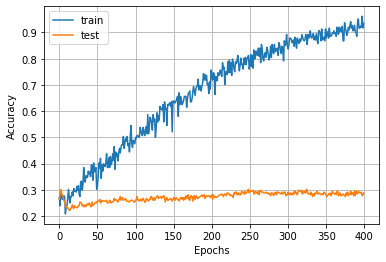

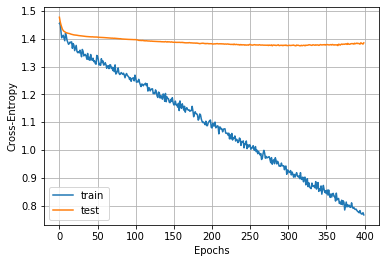

Iteration: 2
288/288 - 0s - loss: 1.3895 - acc: 0.3194
kappa:  0.09259259259259256
f1: 0.30748818632194974
confusion matrix:
 [[40 13 14  5]
 [39 18  8  7]
 [17 17 19 19]
 [14 17 26 15]]


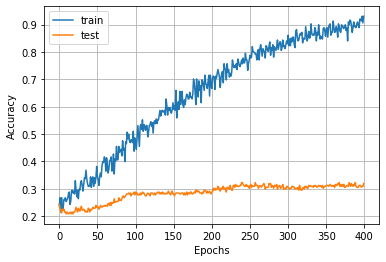

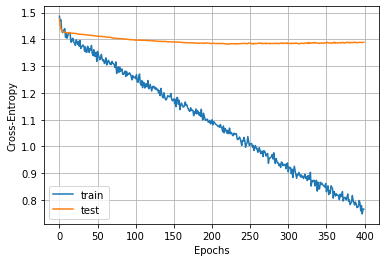

Iteration: 3
288/288 - 0s - loss: 1.3849 - acc: 0.3264
kappa:  0.10185185185185186
f1: 0.32486876041830803
confusion matrix:
 [[30 22 14  6]
 [28 24 14  6]
 [20 13 20 19]
 [23 13 16 20]]


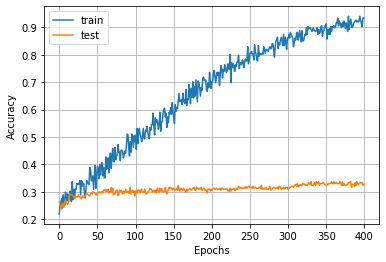

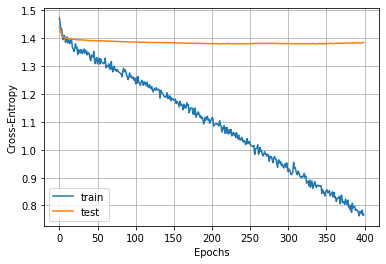

Iteration: 4
288/288 - 0s - loss: 1.3255 - acc: 0.3472
kappa:  0.12962962962962965
f1: 0.34586889468642823
confusion matrix:
 [[26 25  9 12]
 [28 26  8 10]
 [23  6 18 25]
 [15 13 14 30]]


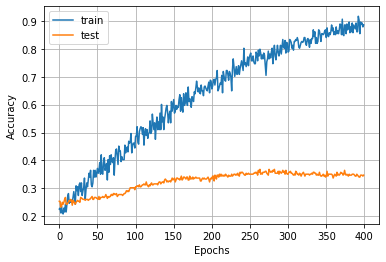

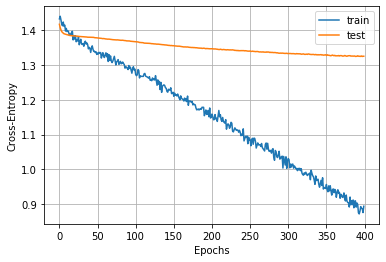

Iteration: 5
288/288 - 0s - loss: 1.3517 - acc: 0.3264
kappa:  0.10185185185185186
f1: 0.3177002751254248
confusion matrix:
 [[24 21 20  7]
 [26 26 11  9]
 [14 15 32 11]
 [14 14 32 12]]


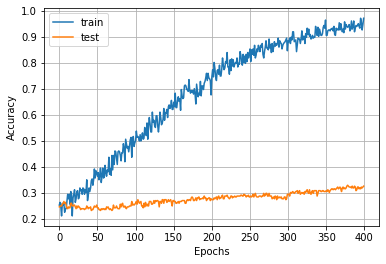

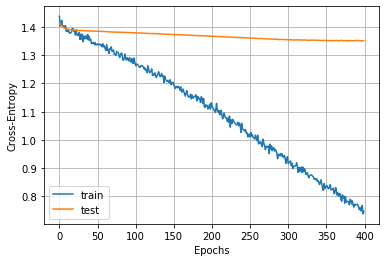


Resultados:
loss: [1.3853198024961684, 1.389543400870429, 1.384901589817471, 1.3254873620139227, 1.3517243332333035]
accuracy: [0.28819445, 0.31944445, 0.3263889, 0.3472222, 0.3263889]
kappa: [0.05092592592592593, 0.09259259259259256, 0.10185185185185186, 0.12962962962962965, 0.10185185185185186]
f1: [0.27747075505140023, 0.30748818632194974, 0.32486876041830803, 0.34586889468642823, 0.3177002751254248]


In [0]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_2D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 20, 1011, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 505, 16)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 503, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 251, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16064)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1028160   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [0]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3215
Mean Kappa: 0.0954
Mean F1: 0.3147
Max Accuracy: 0.3472
Max Kappa: 0.1296
Max F1: 0.3459
